# Case Study Project -- Bank Churn Analytics

#### Why customers left the bank?

1. Domain Exploration
    - Understand the busines process, business domain
    - Understand common challenges in business, identify some doubts
    

2. Data Collection and Exploration
    - Collect data tables and create a dataset
    - Explore common challenges frmo daa
    
    
3. Data Cleaning
    - Handle unwanted columns
    - Handle missing values
    - Handle duplicate entries
    - Handle outliers
    
    
4. Exploratory Data Analytics
    - EDA using Data Visualization
        - Univariate Analytics
        - Bivariate Analytics
        - Multivariate Analytics
    - EDA using statistics
    
    
5. Report Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv(r"/media/novitaguok/New Volume/Bootup.ai/my_project_env/data/Bank_churn_modelling.csv")
df.shape

(10000, 14)

# 2. Data Exploration

In [4]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [5]:
# Unwanted columns = RowNumber, CustomerId, Surname

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Analytics -
1. More than 25% of customers have 0 balance in their bank account
2. Only 51% of customers are actively using bank accounts

# 3. Data Cleaning

In [10]:
# Handle unwanted columns -- DO NOT RUN THIS CELL TWO TIMES OR you will get error
# Unwanted columns = RowNumber, CustomerId, Surname
print(df.shape)
df. drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(df.shape)

(10000, 14)
(10000, 11)


In [11]:
# Handle duplicates
df.duplicated().sum()

0

In [12]:
# Check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# Check for outliers
df.skew() # skewness only on numerical

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

# 4. Exploratory Data Analytics
## EDA Using Data Visualization
### Univariate Analytics

- For categorical features -- barplot
- For numeric features -- histogra

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

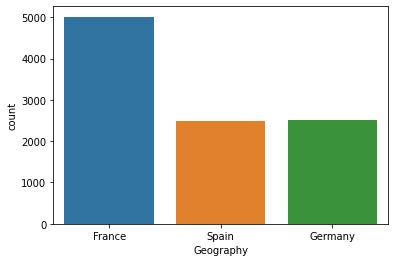

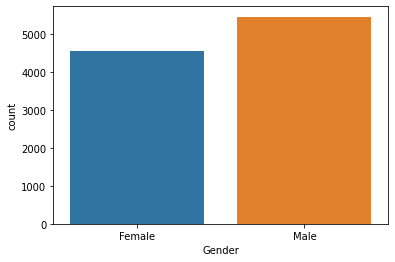

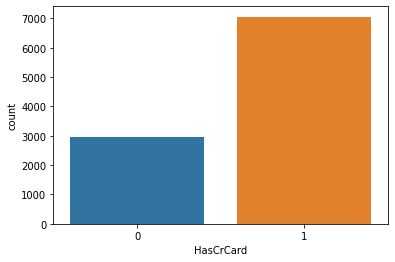

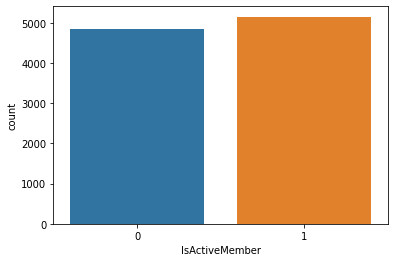

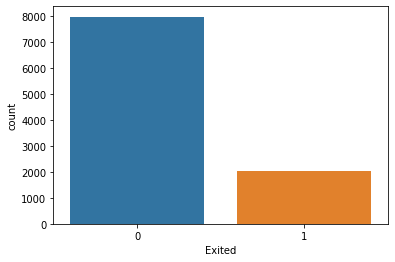

In [16]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(df[col])
    plt.show

Analytics - 
    - Almost 50% of customers are from France and the rest are from Spain and Germany
    - Approximately 55% of customers are Male and the rest are female
    - Approx 50% of customers are not actively using their bank account
    - Almost 70% of all customers have creditcard with them
    - Approx 20% of all customers left the bank

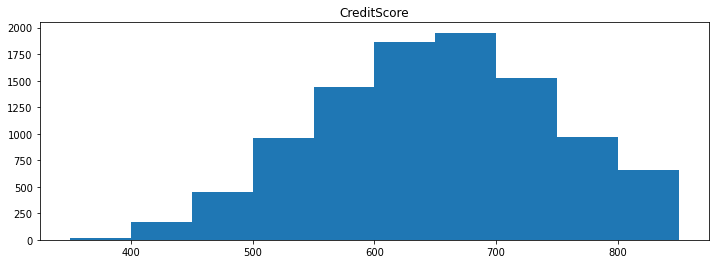

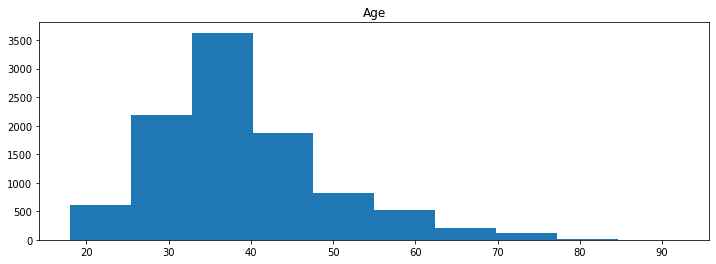

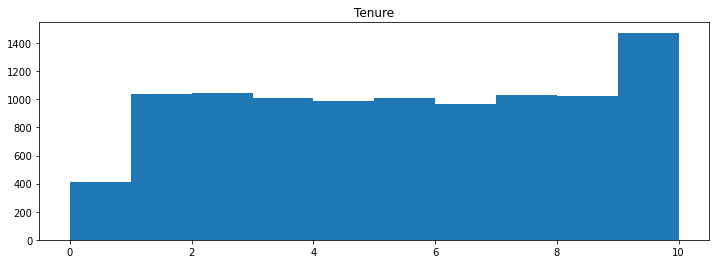

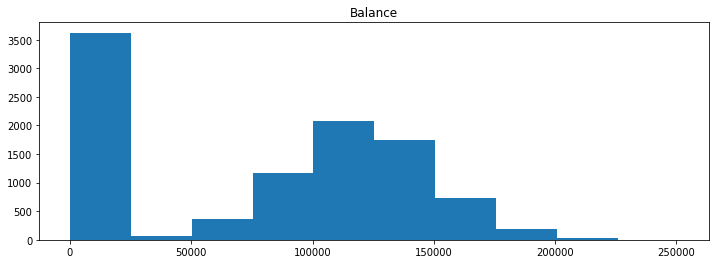

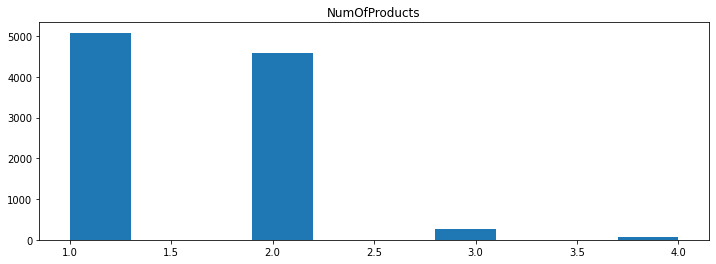

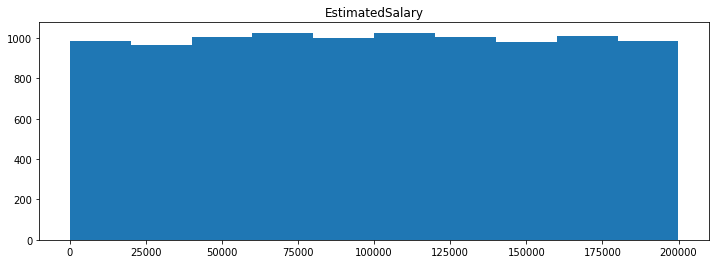

In [17]:
for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.hist(df[col])
    plt.title(col)
    plt.savefig("Graph_univariate_"+col+".png")
    plt.show()

Analytics -
    - Estimated Salary and Tenure has uniform distribution
    - Most of customers have age between 25 to 50, there seems to be some outliers having age > 80
    - There are 2 groups, one having balance = 0, other having balance b/w 75k to 200k
    - Most of customers have Creditscore between 450 to 850
    - Most of customers have 1 or 2 as count of products, very less have 3 or 4 products from bank

# Bivariate Analytics

1. Numeric v/s Categorical - distplot - probability distribution of data (normalized histogram)
2. Categorical v/s Categorcal - countplot

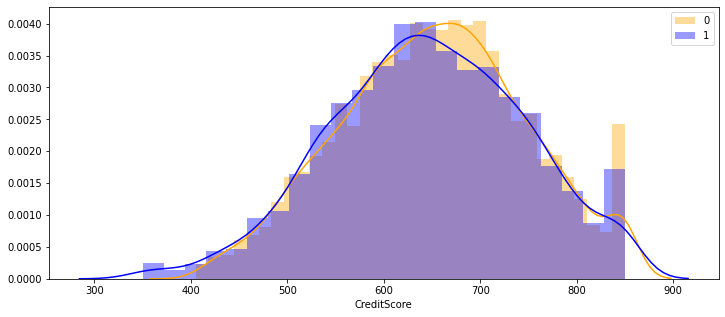

In [18]:
# Numeric v/s categorical
# Creditscore v/s Exited
plt.figure(figsize=(12,5))
sns.distplot(df["CreditScore"][df["Exited"]==0], color='orange')
sns.distplot(df["CreditScore"][df["Exited"]==1], color='blue')
plt.legend(["0", "1"])
plt.show()

Analytics -
    - Both the distributions of CreditScore for Customers with Exited = 0 and Exited = 1 are almost overlapping each other, thus at every value of CreditScore there is almost similar density of customers leaving and not leaving the bank, thus CreditScore has no information to say why customers left the bank.

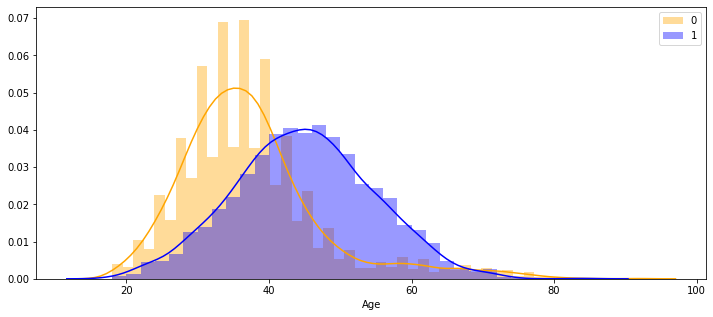

In [19]:
# Numeric v/s categorical
# Creditscore v/s Exited
plt.figure(figsize=(12,5))
sns.distplot(df["Age"][df["Exited"]==0], color='orange')
sns.distplot(df["Age"][df["Exited"]==1], color='blue')
plt.legend(["0", "1"])
# plt.xlim([20,45])
plt.show()

Analytics -
    - Out of two distributions of CreditScore, for age < 40, distribution of age of customers not leaving is higher compared to distribution of age of customers leaving the bank where as for age more than 40, distribution of age of customers leaving the bank is higher compared to not leaving. Thus most of old age customers left the bank.

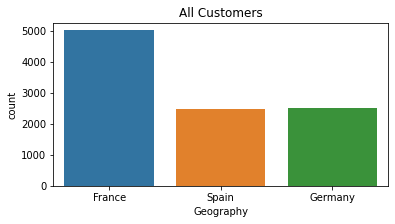

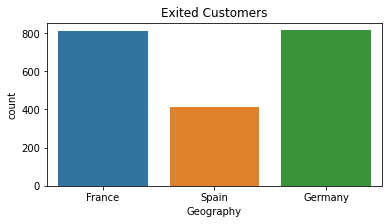

In [20]:
# Categorical v/s Categorical
plt.figure(figsize=(6,3))
sns.countplot(df['Geography'])
plt.title("All Customers")
plt.show()
plt.figure(figsize=(6,3))
sns.countplot(df['Geography'][df["Exited"]==1])
plt.title("Exited Customers")
plt.show()

In [21]:
out = pd.crosstab(df['Geography'], df['Exited'], margins=True)
out

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [22]:
out[1]/out['All']

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

Analytics -
    - Germany out of the three other geographies seems to have higher dropout rate compared to France and Spain.

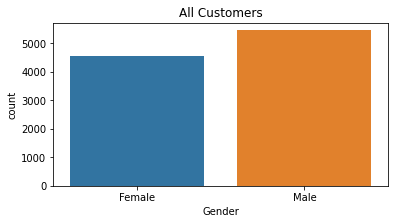

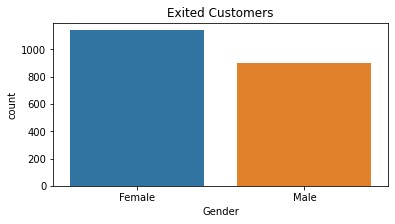

In [23]:
# Gender v/s Exited

# Categorical v/s Categorical
plt.figure(figsize=(6,3))
sns.countplot(df['Gender'])
plt.title("All Customers")
plt.show
plt.figure(figsize=(6,3))
sns.countplot(df['Gender'][df['Exited']==1])
plt.title("Exited Customers")
plt.show()

In [24]:
out = pd.crosstab(df['Gender'], df['Exited'], margins=True)
out[1]/out['All']

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

Analytics -
    - Female customers have higher dropout rate compared to the male customers

<function matplotlib.pyplot.show(*args, **kw)>

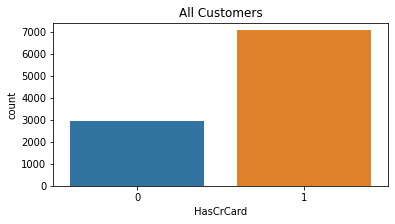

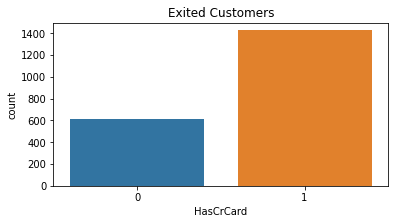

In [25]:
# HasCrCard v/s Exited

# Categorical v/s Categorical
plt.figure(figsize=(6,3))
sns.countplot(df['HasCrCard'])
plt.title("All Customers")
plt.show
plt.figure(figsize=(6,3))
sns.countplot(df['HasCrCard'][df['Exited']==1])
plt.title("Exited Customers")
plt.show

In [26]:
out = pd.crosstab(df['HasCrCard'], df['Exited'], margins=True)
out[1]/out['All']

HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64

### Multivariate Analysis

- Numeric v/s Numeric v/s Categorical - scatterplot
- Numeric v/s Categorical v/s Categorical - pointplot/swarplot/boxplot

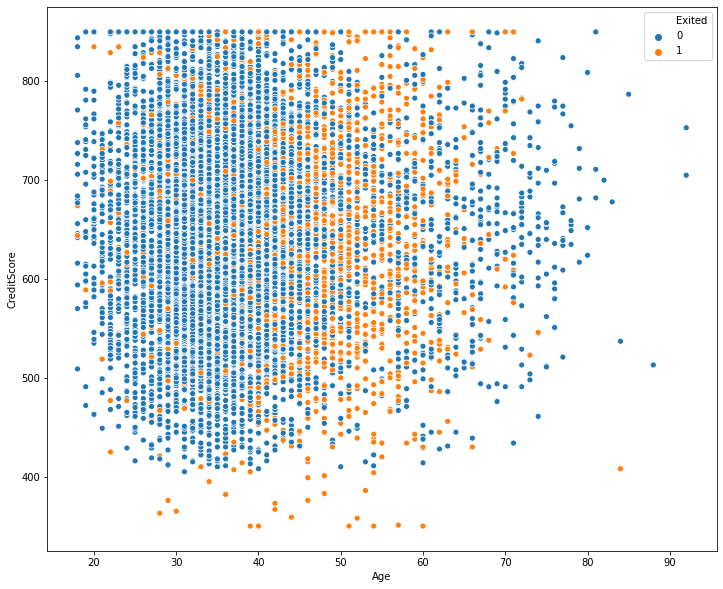

In [27]:
# Numeric v/s Numeric v/s Categorical

plt.figure(figsize=(12,10))
sns.scatterplot(x="Age", y="CreditScore", hue="Exited", data=df)
plt.show()

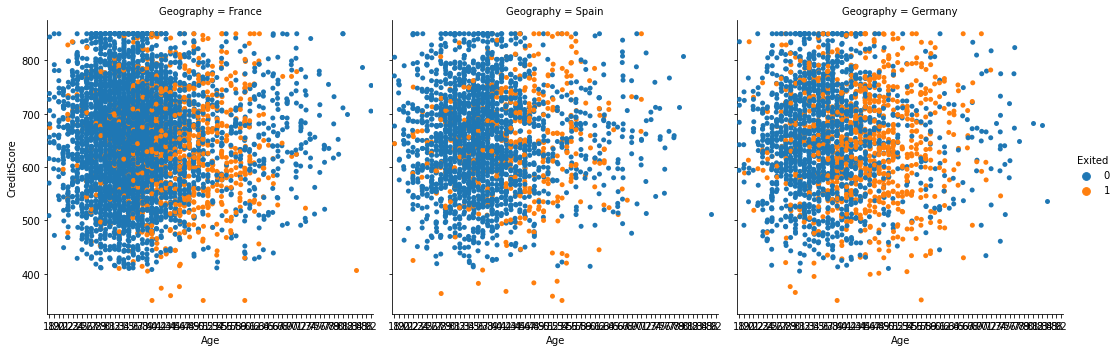

In [28]:
sns.catplot(x="Age", y="CreditScore", hue="Exited", col='Geography', data=df, kind='strip')
plt.show()

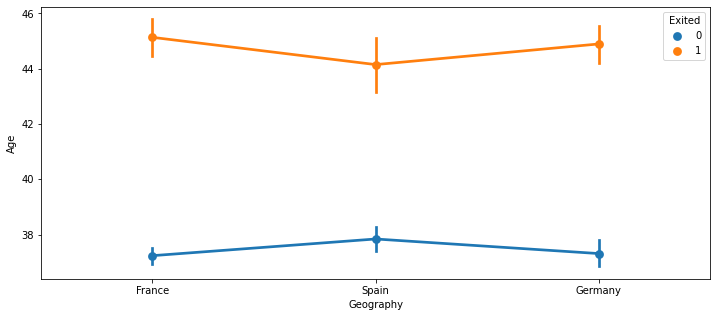

In [29]:
# Numeric v/s Categorical v/s Categorical

# Age v/s Geography v/s Exited
# x = categorical, y = numeric, hue = numeric
plt.figure(figsize=(12,5))
sns.pointplot(x="Geography", y="Age", hue="Exited", data=df)
plt.show()

## EDA Using Statistics

### Correlation Analysis

In [30]:
cor = df.corr()

In [31]:
cor

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


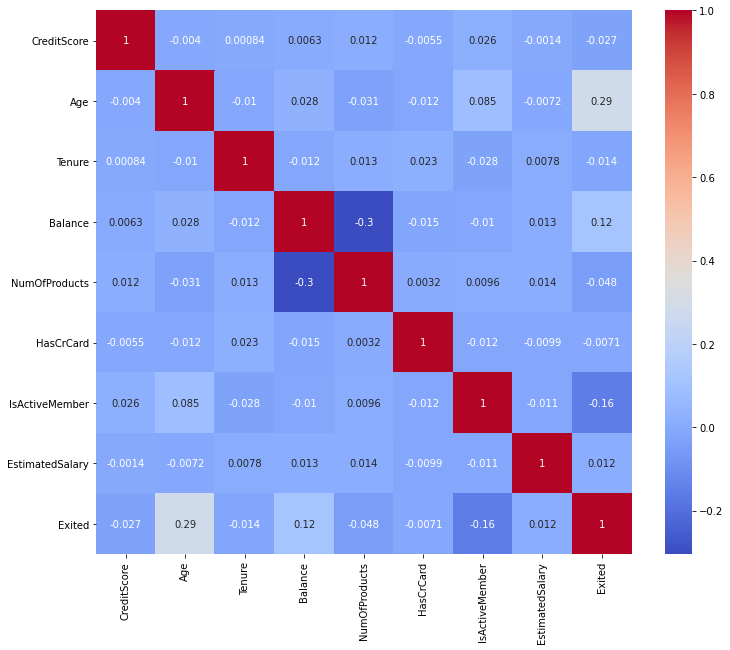

In [32]:
# Use heatmap to visualize correlation
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

- If corr > +0.5 = very good correlation
- If corr is b/w +0.1 to +0.5 = good correlation

- If corr < -0.5 = very good correlation
- If corr is b/w -0.1 to -0.5 = good correlation

- If corr is b/w -0.1 to +0.1 = bad correlation